# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [3]:
# stundent details example: John S. 9812
#                       student details 1: Lior H. 0817
# (if exists)           student details 2: Roi B. 6023
# (if exists)           student details 3: 
# (if exists&premitted) student details 4: 

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: ChatGPT 
Goal: Selecting initial learning algorithms that we would like to test on our dataset. 
Propmpt1: יש לי בעיית למידת מכונה עם דאטה סט קטן, נתונים מספריים בלבד וללא ערכים חסרים והבעיה היא בעיית סיווג, איזה בעיית אלגוריתמי למידה שיתנו תוצאות הכי טובות בהינתן המידע שניתן לך, צור השוואה יתרונות וחסרונות לכל אלגוריתם.

AI agent name: ChatGPT 
Goal: Understanding whether we have OVERFITTING in the model
Propmpt1: מה הקריטריונים לחשד ל-overfitting?
    
Propmpt2: מה ההבדל המקסימלי בין ציון - Train ל-Test שלאחריו נגיד שיש Overfitting במודל שלנו.

AI agent name: ChatGPT 
Goal: Find visualizations that will help us analyze the Dataset
Propmpt1: איזה סוגי ויזואליזציות ממומלץ לבדוק לפני שימוש בבעיית סיווג ובדיקת צורך ב- features engineering

</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>
In this assignment, we address a supervised learning classification problem using the well-known Wine dataset, which includes chemical measurements of wine samples. The goal is to build a model that can classify each wine sample into one of three categories (Class 0, Class 1, or Class 2) based on its numeric attributes.The dataset consists of 178 samples (Train - 142, Test - 36), each described by 13 numerical features.
Each sample is labeled with its wine class. This is a multi-class classification task, as there are three possible target classes.
It is suitable for supervised learning because each input (feature vector) is associated with a known output (label), allowing the model to learn from examples and generalize to new data.

</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [9]:
#Import Libraries/Moudels
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

In [10]:
#Load the data set function
def loadDataset(fileName):
    dataset = pd.read_csv(fileName)
    return dataset

In [11]:
#Show first 5 rows of trainset wine
train_set = loadDataset('wine_train.csv')
train_set.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


In [12]:
#Show first 5 rows of trainset wine
test_set = loadDataset('wine_test.csv')
test_set.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


In [13]:
#Here we checks if there any missing value and 
#we can see that there is no null values so there is not missing value in train set

train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       142 non-null    float64
 1   malic_acid                    142 non-null    float64
 2   ash                           142 non-null    float64
 3   alcalinity_of_ash             142 non-null    float64
 4   magnesium                     142 non-null    float64
 5   total_phenols                 142 non-null    float64
 6   flavanoids                    142 non-null    float64
 7   nonflavanoid_phenols          142 non-null    float64
 8   proanthocyanins               142 non-null    float64
 9   color_intensity               142 non-null    float64
 10  hue                           142 non-null    float64
 11  od280/od315_of_diluted_wines  142 non-null    float64
 12  proline                       142 non-null    float64
 13  targe

In [14]:
#Here we checks if there scaling we need to do or low std

train_set.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.997254,2.297746,2.361690,19.419718,99.943662,2.315986,2.063592,0.346690,1.561901,5.030211,0.958563,2.638873,742.457746,0.922535
std,0.789931,1.093317,0.283231,3.354815,13.683751,0.639469,1.005302,0.117562,0.540979,2.239593,0.219631,0.718083,317.250905,0.772524
min,11.410000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.480000,1.290000,278.000000,0.000000
25%,12.370000,1.592500,2.222500,17.250000,88.000000,1.782500,1.257500,0.260000,1.250000,3.180000,0.800000,1.922500,500.000000,0.000000
50%,13.050000,1.865000,2.360000,19.250000,98.000000,2.380000,2.155000,0.320000,1.505000,4.800000,0.960000,2.815000,660.000000,1.000000
75%,13.637500,3.020000,2.557500,21.375000,108.000000,2.822500,2.887500,0.430000,1.870000,6.182500,1.120000,3.197500,957.500000,2.000000
max,14.750000,5.650000,3.230000,30.000000,151.000000,3.880000,5.080000,0.630000,3.580000,11.750000,1.450000,4.000000,1680.000000,2.000000


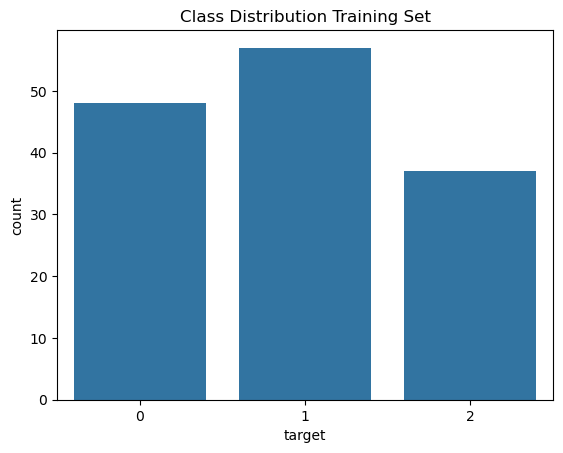

In [15]:
# Visualisation to see the Distribution of each class
# Help to see if the classes count is balance, if it's not it can effects the model quality

sns.countplot(x='target', data=train_set)
plt.title('Class Distribution Training Set')
plt.show()

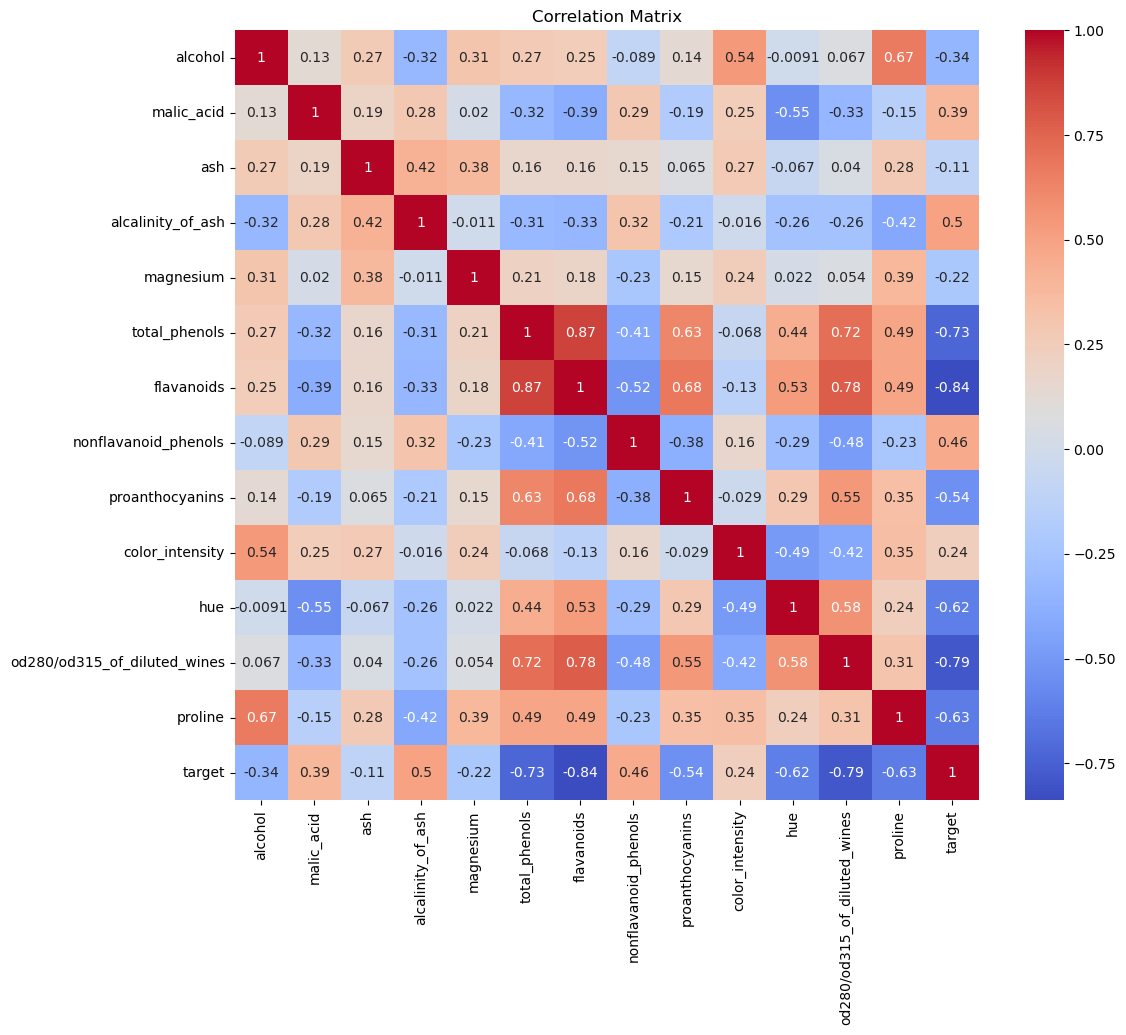

In [16]:
# Visualisation to see the correlatin between all the features
# Help to understand which features as a high correaltion and may effects the training quality.
# In feature engineering, this helps identify features to remove, combine, or transform for better model performance.
# We can see we have high corr between total_phenols and flavanoids (0.87)

plt.figure(figsize=(12,10))
sns.heatmap(train_set.corr(), cmap='coolwarm', annot=True)
plt.title("Correlation Matrix")
plt.show()

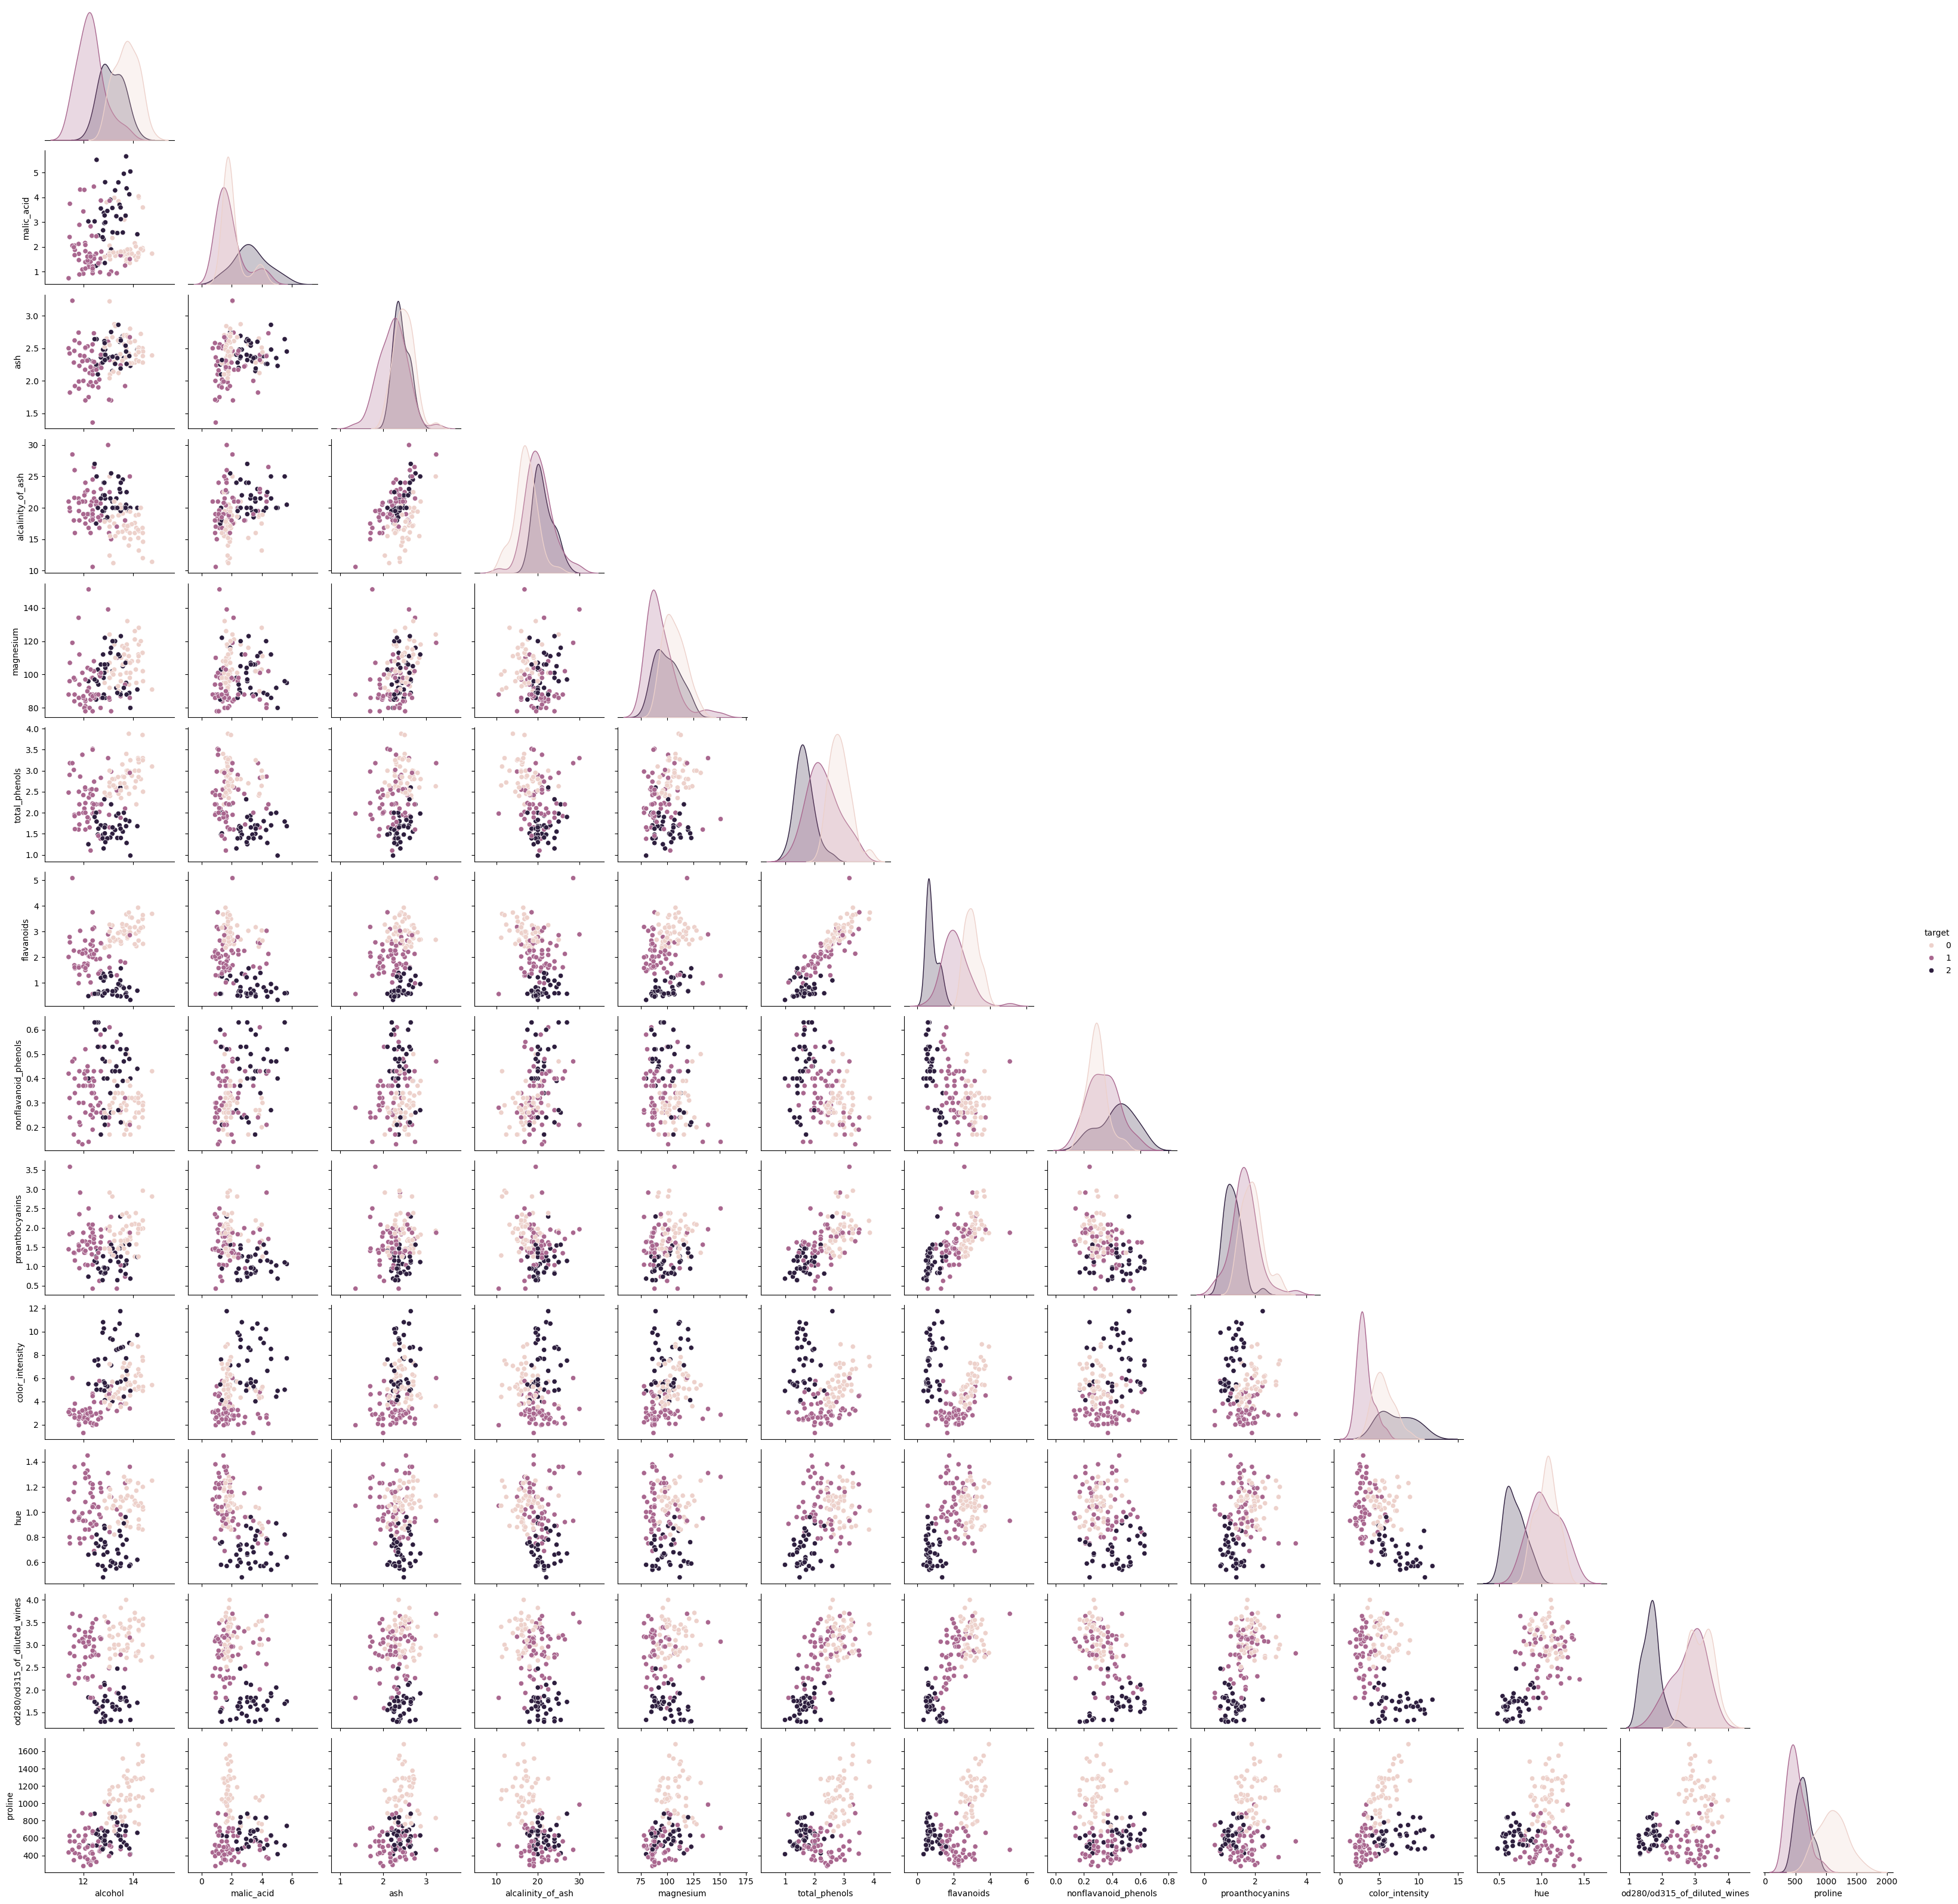

In [17]:
# Visualisation to see the relationships between all pairs of features in the dataset and see the separation of the classes
# Help to identify feature pairs that separate the classes well help to in PCA and fetures selection

sns.pairplot(train_set, hue='target', corner=True)
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [19]:
def split_x_y(df, label_col):
    X = df.drop(label_col, axis=1)
    y= df[label_col]

    return X,y

In [20]:
# Split the dataset into features and labels
X_train,y_train = split_x_y(train_set, 'target')

# Define a pipeline that can apply scaling, feature selection, PCA, and classification in this oreder.
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', 'passthrough'),
    ('pca', 'passthrough'),
    ('clf', KNeighborsClassifier())
])

# Define different parameter grids for different configurations of the pipeline
params = [
   
     { # KNN + PCA
        'pca': [PCA()],
        'pca__n_components': [3,5,7,9,11],
        'scaler': [StandardScaler(), MinMaxScaler(), 'passthrough'], # Try different scalers or no scaling
        'clf': [KNeighborsClassifier()],
        'clf__n_neighbors': [5,7,9,11,15,17,19],
        'clf__weights': ['uniform'],
        'clf__p': [1, 2] #1-Manhattan Distance , 2-Euclidean Distance
    },

    { #KNN
        'pca': ['passthrough'],
        'scaler': [StandardScaler(), MinMaxScaler(), 'passthrough'],
        'clf': [KNeighborsClassifier()],
        'clf__n_neighbors': [5,7,9,11,15,17,19],
        'clf__weights': ['uniform'],
        'clf__p': [1, 2] #1-Manhattan Distance , 2-Euclidean Distance
    },

    { # KNN + Feature Selection
        'feature_selection': [SelectKBest(score_func=f_classif)],
        'feature_selection__k': [5, 7, 'all'],
        'scaler': [StandardScaler(), MinMaxScaler(), 'passthrough'],
        'clf': [KNeighborsClassifier()],
        'clf__n_neighbors': [5,7,9,11,15,17,19],
        'clf__weights': ['uniform'],
        'clf__p': [1, 2] #1-Manhattan Distance , 2-Euclidean Distance
    },

    { #LogisticRegression + PCA
        'pca': [PCA()],
        'pca__n_components': [3,5,7,9,11],
        'scaler': [StandardScaler(), MinMaxScaler(), 'passthrough'],
        'clf': [LogisticRegression()],
        'clf__C': [0.1, 1, 10], # Try different regularization strengths
        'clf__max_iter': [1000, 500]
    },

    { #LogisticRegression
        'pca': ['passthrough'],
        'feature_selection': ['passthrough'],
        'scaler': [StandardScaler(), MinMaxScaler(), 'passthrough'],
        'clf': [LogisticRegression()],
        'clf__C': [0.1, 1, 10],
        'clf__max_iter': [1000, 500]
    },

    { # LogisticRegression + Feature Selection
        'pca': ['passthrough'],
        'feature_selection': [SelectKBest(score_func=f_classif)],
        'feature_selection__k': [5, 7, 'all'],
        'scaler': [StandardScaler(), MinMaxScaler(), 'passthrough'],
        'clf': [LogisticRegression()],
        'clf__C': [0.1, 1, 10],
        'clf__max_iter': [1000, 500]
    }
    
]


scorer = make_scorer(f1_score, average='macro') #Define the evaluation metric- F1-score with macro averaging (good for multi-class)
grid = GridSearchCV(pipe, params, cv=5, scoring=scorer, n_jobs=-1, return_train_score=True) #5-fold cross-validation with the pipeline and the parameters options we set
grid.fit(X_train, y_train) # Train the models and search for the best parameter combination
results = pd.DataFrame(grid.cv_results_)

results_sorted = results.sort_values(by='mean_test_score', ascending=False) #Get info of all tested models ranking from best to worst
results_sorted

C:\Users\Lior\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_clf__n_neighbors,param_clf__p,param_clf__weights,param_pca,param_pca__n_components,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
166,0.006786,0.000240,0.011371,0.001097,KNeighborsClassifier(),17.0,2.0,uniform,PCA(),3.0,...,0.978968,0.042063,1,0.973424,1.000000,0.973434,0.974781,0.973682,0.979064,0.010480
181,0.006952,0.001303,0.011647,0.001436,KNeighborsClassifier(),19.0,1.0,uniform,PCA(),3.0,...,0.978968,0.042063,1,0.946810,1.000000,0.973434,0.974781,0.965661,0.972137,0.017137
91,0.008593,0.002065,0.010887,0.000742,KNeighborsClassifier(),11.0,1.0,uniform,PCA(),3.0,...,0.978968,0.042063,1,0.973424,0.991893,0.973434,0.982723,0.973682,0.979031,0.007354
100,0.007817,0.000854,0.010799,0.000871,KNeighborsClassifier(),11.0,1.0,uniform,PCA(),9.0,...,0.978968,0.042063,1,0.982631,1.000000,0.966853,0.982723,0.982799,0.983001,0.010488
121,0.007179,0.000522,0.011328,0.001257,KNeighborsClassifier(),15.0,1.0,uniform,PCA(),3.0,...,0.978968,0.042063,1,0.964294,1.000000,0.973434,0.965404,0.965661,0.973758,0.013518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,0.004786,0.000672,0.011105,0.000601,KNeighborsClassifier(),5.0,2.0,uniform,PCA(),11.0,...,0.646236,0.087004,531,0.757706,0.814676,0.682814,0.740277,0.733599,0.745814,0.042502
17,0.004055,0.001321,0.009800,0.001085,KNeighborsClassifier(),5.0,2.0,uniform,PCA(),3.0,...,0.639862,0.082933,537,0.757706,0.814676,0.682814,0.728436,0.722980,0.741322,0.043761
263,0.006770,0.000937,0.011765,0.001159,KNeighborsClassifier(),5.0,2.0,uniform,NaN,NaN,...,0.632939,0.097744,538,0.806346,0.821451,0.753314,0.795144,0.765109,0.788273,0.025430
266,0.006654,0.000343,0.010661,0.000491,KNeighborsClassifier(),5.0,2.0,uniform,NaN,NaN,...,0.632939,0.097744,538,0.806346,0.821451,0.748632,0.795144,0.765109,0.787336,0.026752


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [22]:
best_params = grid.best_params_
best_score = grid.best_score_

best_model = grid.best_estimator_ #Retrieve the pipeline/model with the best combination of parameters
best_model.fit(X_train, y_train) #Retrain the best model on the full training data (with the best parameters)

best_params

{'clf': KNeighborsClassifier(),
 'clf__n_neighbors': 5,
 'clf__p': 2,
 'clf__weights': 'uniform',
 'pca': PCA(),
 'pca__n_components': 3,
 'scaler': MinMaxScaler()}

## Part 5 - Apply on test and show model performance estimation

In [24]:
X_test,y_test = split_x_y(test_set, 'target')

y_pred = best_model.predict(X_test) #Use the full best model that found to make predictions on the test data

# Evaluate the model
print(classification_report(y_test, y_pred)) #Print a detailed classification report - precision, recall, f1-score on each class and accuracy score of the model

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.86      0.92        14
           2       0.92      1.00      0.96        11

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



<Axes: >

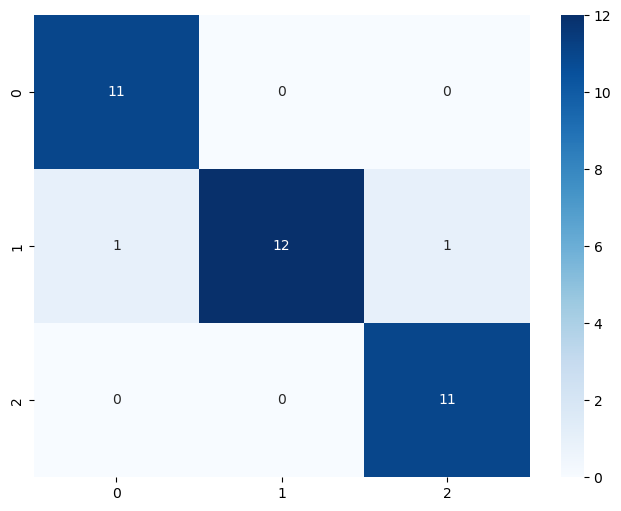

In [25]:
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [26]:
print("First 5 predictions on the test:")
print(y_pred[:5])

First 5 predictions on the test:
[2 0 2 1 2]
